# Linear Regression - medical insurance

In [39]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

In [40]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [45]:
df['sex'].replace({'female':0,'male':1},inplace = True)

In [46]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [47]:
df['smoker'].replace({'no':1,'yes':0},inplace = True)

In [48]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [49]:
df = pd.get_dummies(df ,columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


In [50]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## Train Test split

In [52]:
df = df.select_dtypes(exclude=object) 
x = df.drop('charges',axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [53]:
x_train.head(3)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
414,19,0,35.15,0,1,0,1,0,0
1279,25,0,26.79,2,1,0,1,0,0
647,40,0,23.37,3,1,1,0,0,0


In [54]:
std_scaler = StandardScaler()
std_scaler.fit(x_train) ## We are storing mean and std Values
array = std_scaler.transform(x_train)
std_train_xdf = pd.DataFrame(array,columns= x_train.columns)
std_train_xdf.head(3)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423968,-1.03423,0.733447,-0.918456,0.504377,-0.566558,1.787758,-0.598221,-0.585264
1,-0.995215,-1.03423,-0.634787,0.784746,0.504377,-0.566558,1.787758,-0.598221,-0.585264
2,0.076668,-1.03423,-1.194519,1.636347,0.504377,1.765045,-0.559360,-0.598221,-0.585264


# Model Training

In [55]:
model = KNeighborsRegressor(n_neighbors=6)
model.fit(std_train_xdf, y_train)

KNeighborsRegressor(n_neighbors=6)

In [56]:
x_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
670,30,1,31.570,3,1,0,0,1,0
318,44,0,27.645,0,1,0,1,0,0
345,34,0,29.260,3,1,0,0,1,0
1335,18,0,36.850,0,1,0,0,1,0
535,38,1,28.025,1,1,1,0,0,0


In [57]:
# Testing Data Evaluation

array = std_scaler.transform(x_test)
std_test_df = pd.DataFrame(array,columns= x_test.columns)

y_pred = model.predict(std_test_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)


MSE : 32039392.02211075
RMSE : 5660.33497437305
MAE : 3409.1500493202734
R-Squared : 0.8029386580233049


In [58]:
# Training Data Evaluation

y_pred_train = model.predict(std_train_xdf)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 21055948.985271744
RMSE : 4588.676169144184
MAE : 2813.4603319378502
R-Squared : 0.852022659381254


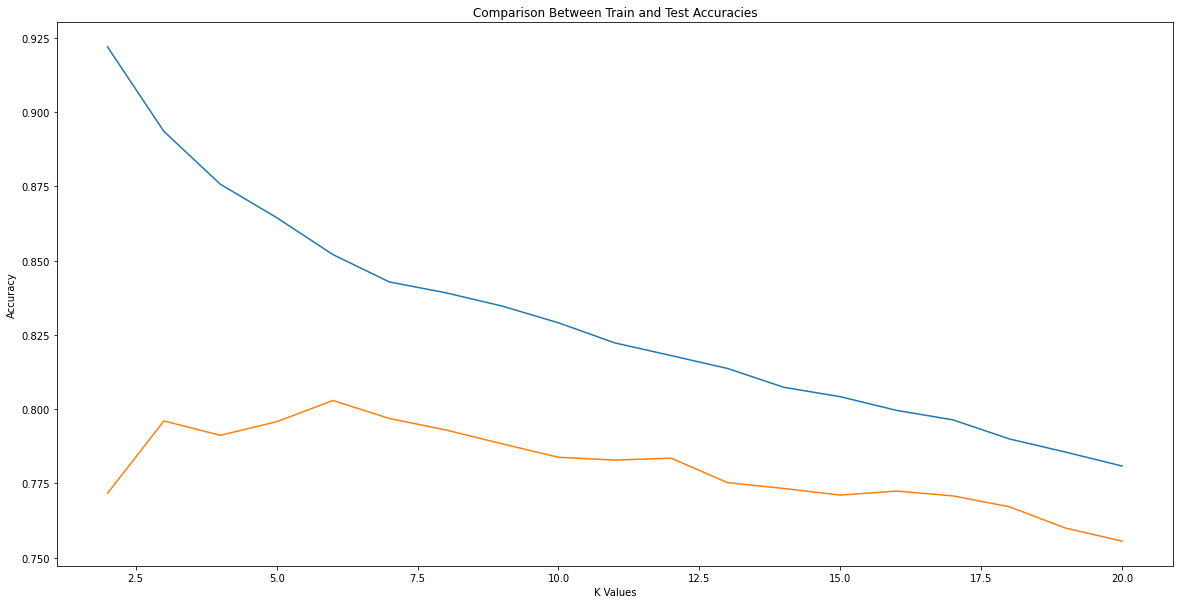

In [94]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p = 2)
    knn_reg.fit(std_train_xdf, y_train)
    r2_train = knn_reg.score(std_train_xdf, y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(std_test_df, y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel('K Values')
plt.ylabel("Accuracy")
plt.title('Comparison Between Train and Test Accuracies')
plt.savefig('K Values Comparison.jpeg')

# Testing on Single Row

In [82]:
age = 67.0
sex = 'male'
bmi = 28.3
children = 3
smoker = 'yes'
region = 'southeast'

# charges = ?

In [83]:
project_data = {"sex" : {'female':0,'male':1},
                     "smoker" : {'no':1,'yes':0},
                     'columns' : list(x.columns)}

In [84]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [85]:
region =  'region_' + region
region_index = np.where(column_names == region)[0][0]
region_index

7

In [86]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = label_encoded_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = label_encoded_data['smoker'][smoker]
test_array[region_index] = 1

test_array

array([67. ,  1. , 28.3,  3. ,  0. ,  0. ,  0. ,  1. ,  0. ])

In [87]:
std_array = std_scaler.transform([test_array])
std_array

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.00605694,  0.96690255, -0.38765356,  1.63634738, -1.98264358,
        -0.56655772, -0.55935984,  1.67162383, -0.58526447]])

In [88]:
model.predict(std_array)

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([35109.17123333])

In [89]:
with open(r'G:\4)Velocity\08-Aug\08_17_Flask_medical_insurence_KNN\artifacts\KNN_Regression_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [90]:
with open(r"G:\4)Velocity\08-Aug\08_17_Flask_medical_insurence_KNN\artifacts\Std_Scaling.pkl",'wb') as f:
    pickle.dump(std_scaler,f)

In [91]:
with open(r"G:\4)Velocity\08-Aug\08_17_Flask_medical_insurence_KNN\artifacts\project_data.json",'w') as f:
    json.dump(project_data,f)